In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [127]:
se_df = pd.read_csv('https://grantmlong.com/data/streeteasy_rents_june2016.csv')

In [128]:
se_df.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


## Data Exploration

### Summarize and Plot a Histogram for the Target Variable

In [129]:
se_df.describe()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5526.909400,5.122007e+07,4536.920800,1.395700,1.321600,920.101400,5.079200,10.190200,52.093200,0.429600,0.12860,0.133800,0.228000,0.240000,0.155600,0.045600,0.143800
std,3263.692417,2.802283e+07,2929.838953,0.961018,0.565542,440.150464,5.268897,10.565361,40.224501,0.495069,0.33479,0.340471,0.419585,0.427126,0.362512,0.208637,0.350922
min,1.000000,7.107000e+03,1250.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2699.750000,2.699811e+07,2750.000000,1.000000,1.000000,633.000000,2.000000,3.000000,12.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5456.500000,5.069894e+07,3600.000000,1.000000,1.000000,800.000000,4.000000,6.000000,44.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8306.000000,7.572064e+07,5200.000000,2.000000,2.000000,1094.000000,6.000000,14.000000,89.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11349.000000,9.998721e+07,20000.000000,5.000000,5.000000,4800.000000,51.000000,83.000000,180.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


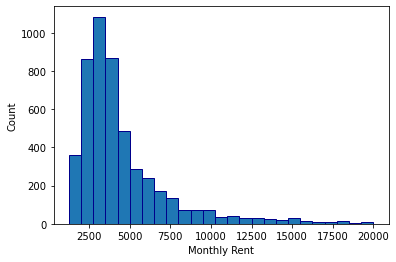

In [130]:
se_df["rent"].hist(grid=False,edgecolor="darkblue",bins=25)
plt.xlabel('Monthly Rent')
plt.ylabel('Count')
plt.show()

### Feature Exploration

<AxesSubplot:>

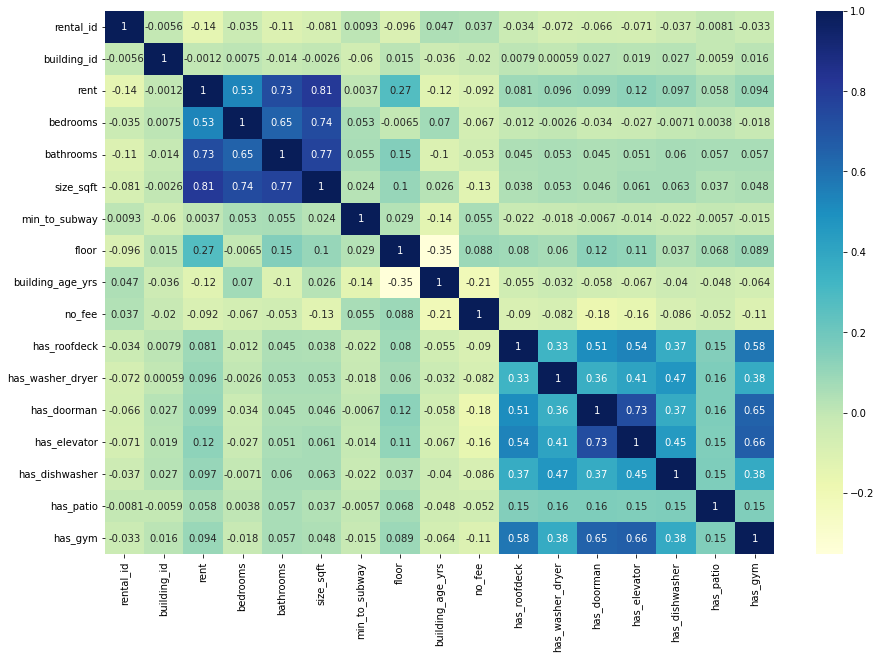

In [131]:
plt.figure(figsize=(15,10))
co=se_df.corr()
sns.heatmap(co,annot=True,cmap="YlGnBu")

#### How many variables are at our disposal?

In [132]:
len(se_df.columns)

20

#### Which are binary? Categorical? Continuous?

In [133]:
se_df.dtypes

rental_id             int64
building_id           int64
rent                  int64
bedrooms            float64
bathrooms             int64
size_sqft             int64
min_to_subway         int64
floor               float64
building_age_yrs      int64
no_fee                int64
has_roofdeck          int64
has_washer_dryer      int64
has_doorman           int64
has_elevator          int64
has_dishwasher        int64
has_patio             int64
has_gym               int64
neighborhood         object
submarket            object
borough              object
dtype: object

#### Identify which variable has the highest correlation with rent

In [134]:
se_df.corr()['rent'].sort_values(ascending=False)[1:]

size_sqft           0.808784
bathrooms           0.733644
bedrooms            0.531200
floor               0.272351
has_elevator        0.120822
has_doorman         0.099106
has_dishwasher      0.096631
has_washer_dryer    0.096136
has_gym             0.093737
has_roofdeck        0.081286
has_patio           0.058260
min_to_subway       0.003652
building_id        -0.001235
no_fee             -0.091769
building_age_yrs   -0.122302
rental_id          -0.142801
Name: rent, dtype: float64

_size_sqft has highest correlation_

#### Create a scatterplot of size_sqft , bathrooms , and floor.

<AxesSubplot:xlabel='size_sqft', ylabel='rent'>

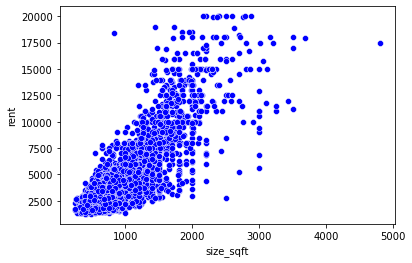

In [135]:
sns.scatterplot(data=se_df,x='size_sqft',y='rent',color='blue')

<AxesSubplot:xlabel='bathrooms', ylabel='rent'>

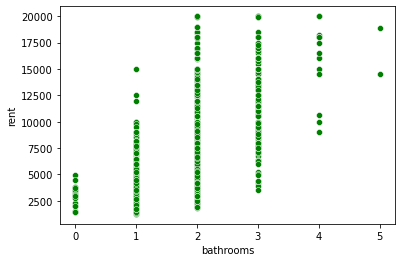

In [136]:
sns.scatterplot(data=se_df,x='bathrooms',y='rent',color='green')

<AxesSubplot:xlabel='floor', ylabel='rent'>

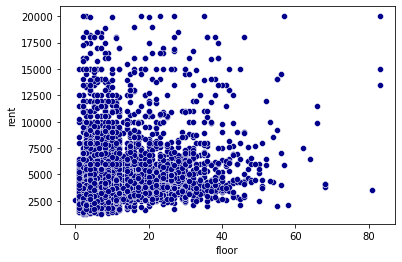

In [137]:
sns.scatterplot(data=se_df,x='floor',y='rent',color='darkblue')

## Modeling

#### Calculate the slope and intercept using the polyfit function , Print the slope and intercept.

In [138]:
b,a=np.polyfit(se_df.size_sqft,se_df.rent,1)

In [139]:
print('b: %0.3f, a: %0.1f.'%(b,a))


b: 5.384, a: -416.6.


#### Based on this data, how much would expect a 700 square foot apartment to cost?

In [140]:
print('Based on this analysis, a 700 square foot apartment would rent for $%0.2f'%(b*700+a))

Based on this analysis, a 700 square foot apartment would rent for $3351.98


#### Plot the fitted line along with the scatter plot.

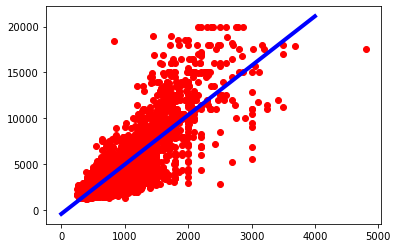

In [141]:
plt.plot(se_df.size_sqft,se_df.rent,color='red',marker='.',markersize=12,linestyle='none')
plt.plot([0,4000],[a,a+b*4000],color='blue',linewidth=4)

### Calculate the predicted rent and residual for each observation.

#### Create columns in the se_df dataframe for rent_predicted and rent_residual

In [142]:
se_df['rent_predicted']=se_df['rent']*b+a
se_df['rent_residual']=se_df['rent_predicted']-se_df['rent']

In [143]:
se_df.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,...,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough,rent_predicted,rent_residual
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,...,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan,13311.685057,10761.685057
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,...,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan,61495.136533,49995.136533
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,...,0,0,0,0,0,Astoria,Northwest Queens,Queens,15734.316696,12734.316696
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,...,1,1,1,0,0,Midtown,All Midtown,Manhattan,23809.755491,19309.755491
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,...,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan,25397.925120,20602.925120


<AxesSubplot:>

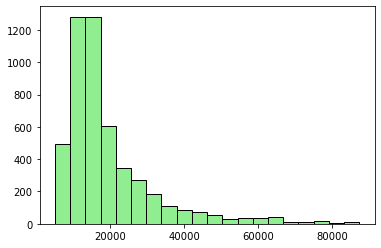

In [144]:
se_df['rent_residual'].hist(bins=20,color='lightgreen',grid=False,edgecolor='black')

In [145]:
dv=['bedrooms', 'bathrooms', 'min_to_subway', 'floor',
'building_age_yrs', 'no_fee', 'has_roofdeck',
'has_washer_dryer', 'has_doorman', 'has_elevator',
'has_dishwasher', 'has_patio', 'has_gym']

In [146]:
X=se_df[dv]
X

,bedrooms,bathrooms,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,0.0,1,9,2.0,17,1,1,0,0,1,1,0,1
1,2.0,2,4,1.0,96,0,0,0,0,0,0,0,0
2,3.0,1,4,1.0,106,0,0,0,0,0,0,0,0
3,1.0,1,2,51.0,29,0,1,0,1,1,1,0,0
4,1.0,1,3,8.0,31,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.0,1,9,4.0,3,1,0,0,0,0,0,0,0
4996,2.0,2,5,10.0,9,1,1,1,1,1,1,0,1
4997,0.0,1,2,5.0,96,0,0,0,0,0,0,0,0
4998,1.0,1,6,5.0,14,1,0,1,1,1,1,0,1


In [147]:
lm=LinearRegression()
lm.fit(X,se_df.rent)

LinearRegression()

#### Estimated intercept and coefficients

In [148]:
print("intercept=",lm.intercept_)
print("No of coefficients=",len(lm.coef_))

intercept= -515.5040360810199
No of coefficients= 13


In [149]:
pd.DataFrame(lm.coef_,index=dv,columns=['Estimated Coefficients'])

,Estimated Coefficients
bedrooms,417.730687
bathrooms,3171.816130
min_to_subway,-22.630204
floor,49.132507
building_age_yrs,-1.488370
no_fee,-344.120712
has_roofdeck,-4.475219
has_washer_dryer,191.475476
has_doorman,-41.004582
has_elevator,400.797299


### Predict Prices


In [150]:
se_df['Predicted_value']=lm.predict(X)

In [151]:
se_df[['rent','Predicted_value']]

,rent,Predicted_value
0,2550,2629.064883
1,11500,6479.317777
2,3000,3710.348635
3,4500,5994.052572
4,4795,3764.126005
...,...,...
4995,2650,2718.315156
4996,6675,7282.301113
4997,1699,2713.830709
4998,3475,3421.494926


#### first five predicted prices

In [152]:
d=lm.predict(X)[0:5]
d

array([2629.06488344, 6479.31777692, 3710.34863476, 5994.05257186,
       3764.12600492])

Text(0, 0.5, 'frequency')

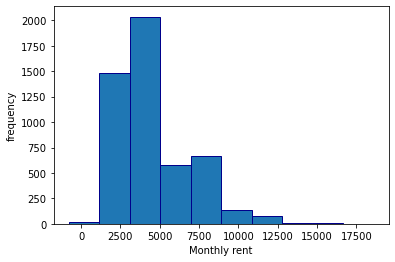

In [153]:
plt.hist(se_df['Predicted_value'],edgecolor='darkblue')
plt.xlabel('Monthly rent')
plt.ylabel('frequency')

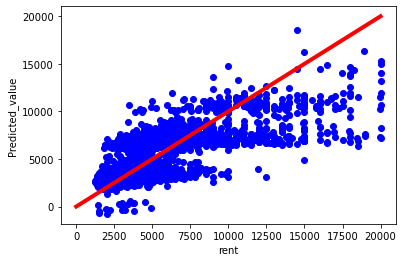

In [154]:
plt.scatter(se_df['rent'],se_df['Predicted_value'],color='blue')
plt.xlabel('rent')
plt.ylabel('Predicted_value')
plt.plot([0,20000],[0,20000],linewidth=4,color='red')

### Residual sum of squares

In [155]:
print('%0.2f'% np.sum((se_df['rent']-lm.predict(X))**2))

17730479762.04
